## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

## Importing Dataframes

In [2]:
path = r"/Users/katalysenko/Documents/Airbnb Analysis"

In [3]:
# Import of df

df = pd.read_csv(r"/Users/katalysenko/Documents/Airbnb Analysis/02 Data/Prepared Data/df_clean.csv",index_col=False) 

In [4]:
df.head()

,Unnamed: 0,name,host_identity_verified,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,0,Clean & quiet apt home by the park,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,...,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1,Skylit Midtown Castle,verified,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,...,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,4,Entire Apt: Spacious Studio/Loft by central park,verified,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,...,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
3,5,Large Cozy 1 BR Apartment In Midtown East,verified,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,...,2013.0,$577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0
4,7,BlissArtsSpace!,unconfirmed,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,...,2009.0,"$1,060",$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df.head()

,name,host_identity_verified,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,Clean & quiet apt home by the park,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,...,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,Skylit Midtown Castle,verified,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,...,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,Entire Apt: Spacious Studio/Loft by central park,verified,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,...,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
3,Large Cozy 1 BR Apartment In Midtown East,verified,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,...,2013.0,$577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0
4,BlissArtsSpace!,unconfirmed,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,moderate,...,2009.0,"$1,060",$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0


In [7]:
data_types = df.dtypes
print(data_types)

name                               object
host_identity_verified             object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                     bool
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
dtype: object


## Create a correlation matrix heatmap (colored)

In [8]:
df_matrix = df.select_dtypes(include=['float64','int64'])

In [9]:
df_matrix

,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,40.64749,-73.97237,2020.0,10.0,9.0,0.21,4.0,6.0,286.0
1,40.75362,-73.98377,2007.0,30.0,45.0,0.38,4.0,2.0,228.0
2,40.79851,-73.94399,2009.0,10.0,9.0,0.10,3.0,1.0,289.0
3,40.74767,-73.97500,2013.0,3.0,74.0,0.59,3.0,1.0,374.0
4,40.68688,-73.95596,2009.0,45.0,49.0,0.40,5.0,1.0,219.0
...,...,...,...,...,...,...,...,...,...
84181,40.74068,-73.98999,2016.0,1.0,177.0,3.78,4.0,1.0,410.0
84182,40.77408,-73.98181,2005.0,5.0,17.0,0.35,5.0,1.0,134.0
84183,40.72826,-73.98422,2017.0,1.0,8.0,0.16,4.0,2.0,152.0
84184,40.80460,-73.96545,2016.0,1.0,1.0,0.02,2.0,2.0,395.0


In [10]:
corr_matrix = df_matrix.corr()

In [11]:
corr_matrix

,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
lat,1.000000,0.073890,0.006926,0.017804,-0.021904,-0.020209,-0.004823,0.026589,-0.013267
long,0.073890,1.000000,-0.000434,-0.033405,0.065525,0.118506,0.015169,-0.091821,0.074352
Construction year,0.006926,-0.000434,1.000000,0.002416,0.003595,0.005235,0.005487,-0.003092,-0.007374
minimum nights,0.017804,-0.033405,0.002416,1.000000,-0.048103,-0.095183,0.000466,0.068108,0.044026
number of reviews,-0.021904,0.065525,0.003595,-0.048103,1.000000,0.595514,-0.019672,-0.079632,0.108033
reviews per month,-0.020209,0.118506,0.005235,-0.095183,0.595514,1.000000,0.037815,-0.024764,0.078296
review rate number,-0.004823,0.015169,0.005487,0.000466,-0.019672,0.037815,1.000000,0.023852,-0.011863
calculated host listings count,0.026589,-0.091821,-0.003092,0.068108,-0.079632,-0.024764,0.023852,1.000000,0.135865
availability 365,-0.013267,0.074352,-0.007374,0.044026,0.108033,0.078296,-0.011863,0.135865,1.000000


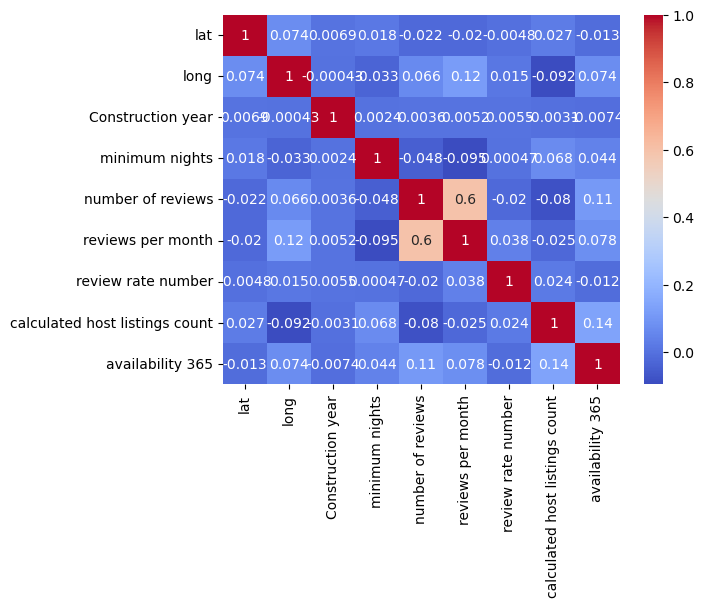

In [12]:
# Create the heatmap

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


We can see that there are no strong correlations between these variables, the highest correlation is between the number of views and the number of views per month, which is not really meaningful for analysis as it is the result of the same data presented in different ways.

## Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

In [13]:
col1 = 'neighbourhood group'
col2 = 'number of reviews'

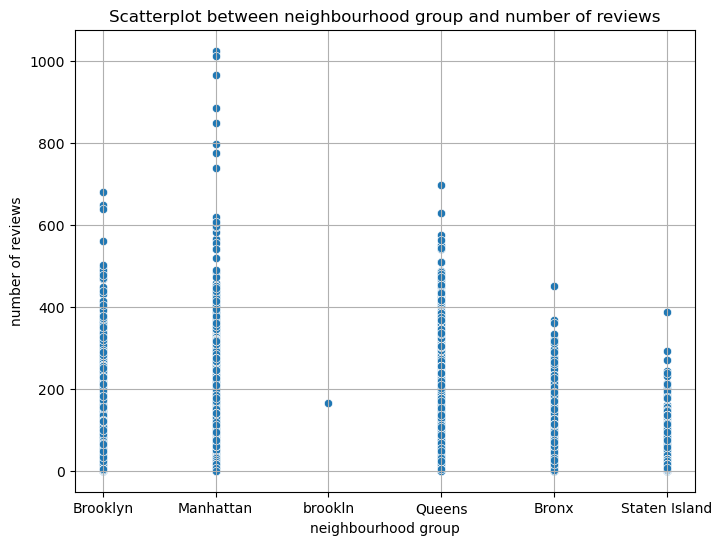

In [14]:
# Create a scatterplot

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=col1, y=col2)
plt.title(f'Scatterplot between {col1} and {col2}')
plt.xlabel(col1)
plt.ylabel(col2)
plt.grid(True)
plt.show()

In [15]:
col3 = 'availability 365'
col4 = 'reviews per month'

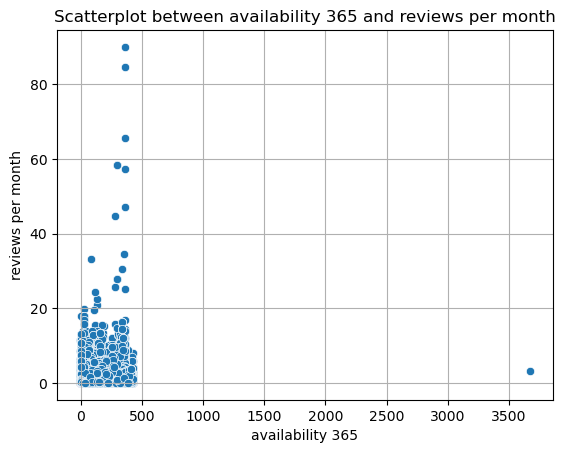

In [16]:
plt.figure
sns.scatterplot(data=df, x=col3, y=col4)
plt.title(f'Scatterplot between {col3} and {col4}')
plt.xlabel(col3)
plt.ylabel(col4)
plt.grid(True)
plt.show()

Although here we can see the relationship between the variables, we were also able to see the presence of outliers, which may prevent us from conducting a qualitative analysis in the future.
Therefore, we will try to use subgroups in further analysis.

## Create a pair plot of the entire data set

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/Users/katalysenko/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


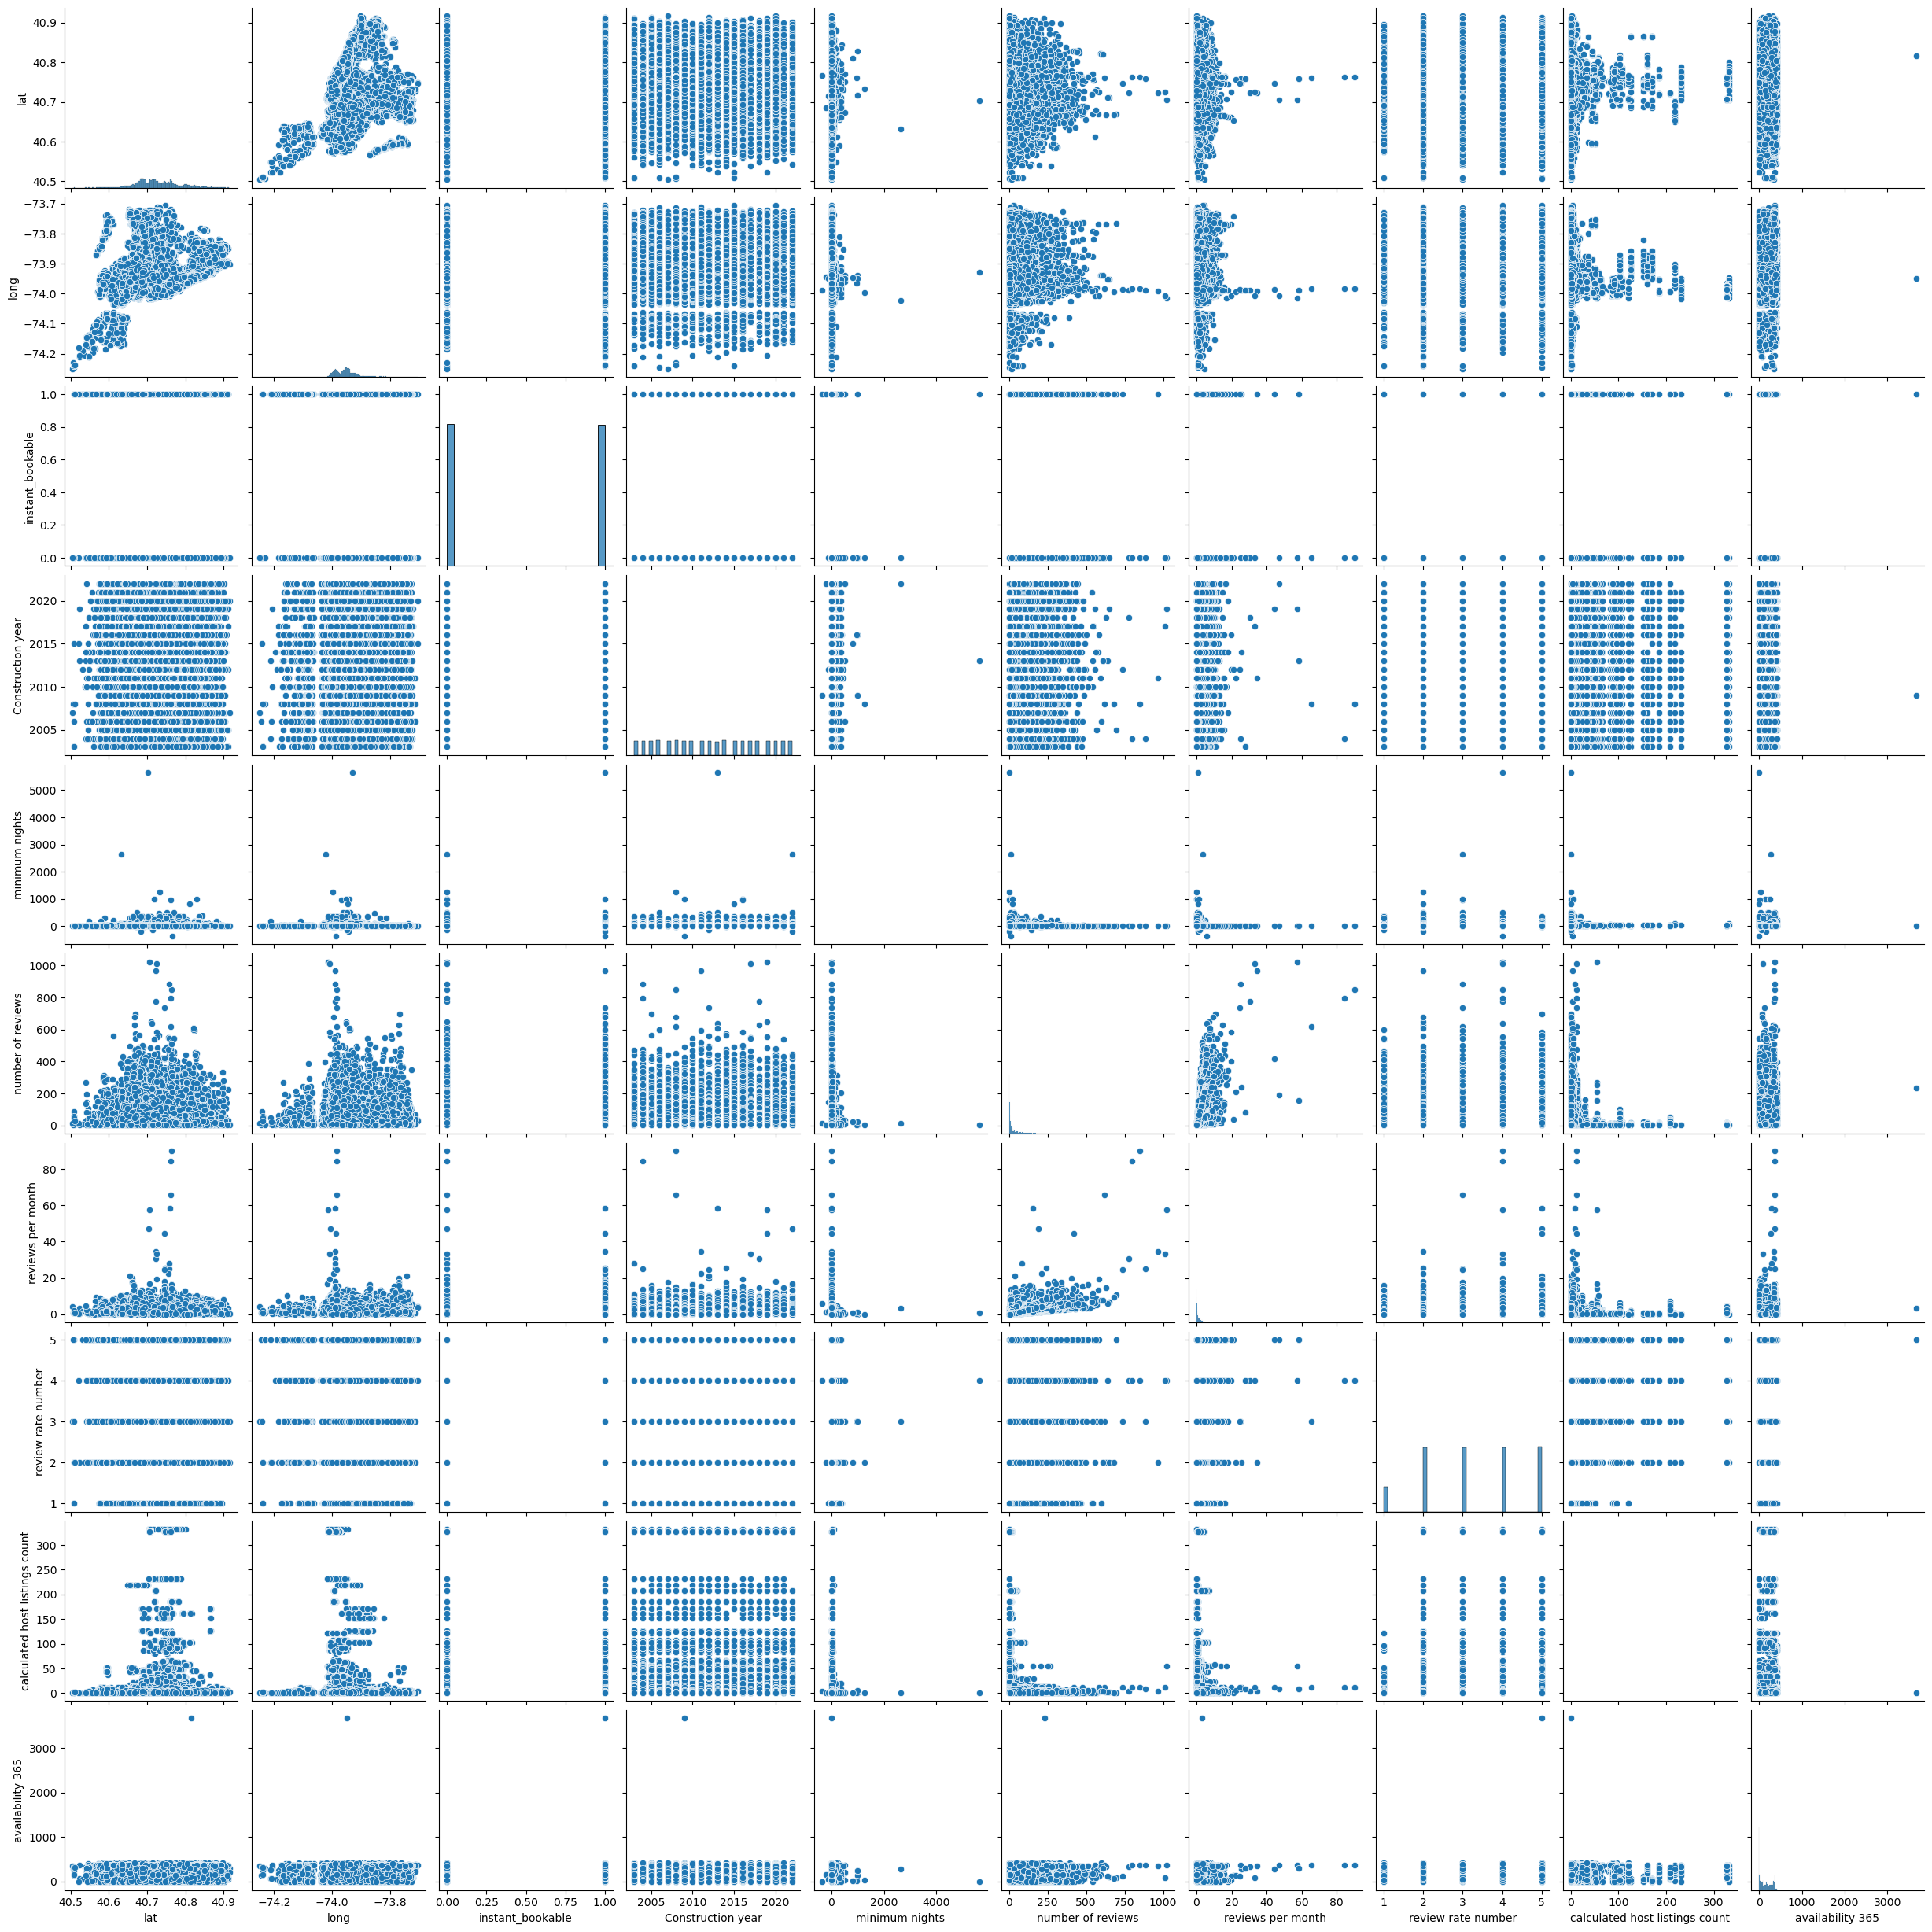

In [17]:
pairplot = sns.pairplot(df)
plt.show()

Looking at this pairwise graph, we still can't see a strong relationship between these variables, but there are a few variables that I would like to further explore in a category graph, such as accessibility and number of views. 

## Create a categorical plot and interpret the results

<Axes: xlabel='number of reviews', ylabel='Count'>

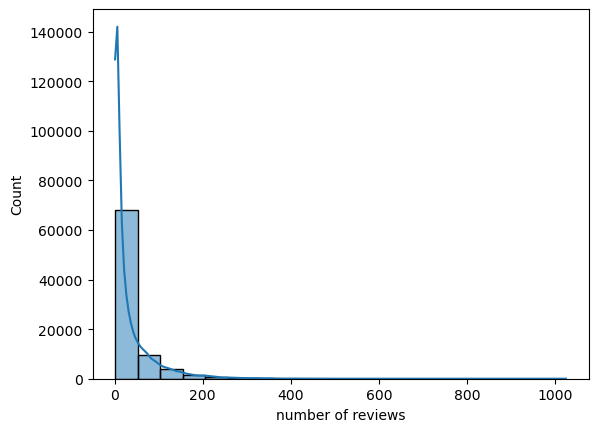

In [18]:
sns.histplot(df['number of reviews'],bins = 20, kde = True)

In [19]:
df['number of reviews'].describe()

count    84186.000000
mean        32.198002
std         51.839253
min          1.000000
25%          3.000000
50%         11.000000
75%         38.000000
max       1024.000000
Name: number of reviews, dtype: float64

In [20]:
Q1 = df['number of reviews'].quantile(0.25)
Q3 = df['number of reviews'].quantile(0.75)

In [21]:
# Create flags

df['review_flags'] = 'low_review_count'
df.loc[df['number of reviews'] >= Q1, 'review_flags'] = 'medium_review_count'
df.loc[df['number of reviews'] >= Q3, 'review_flags'] = 'high_review_count'
df.loc[df['number of reviews'] > df['number of reviews'].max(), 'review_flags'] = 'very_high_review_count'

In [22]:
df['review_flags'].value_counts(dropna = False)

review_flags
medium_review_count    45668
high_review_count      21362
low_review_count       17156
Name: count, dtype: int64

In [23]:
df.columns

Index(['name', 'host_identity_verified', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'country', 'country code',
       'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'review_flags'],
      dtype='object')

/Users/katalysenko/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


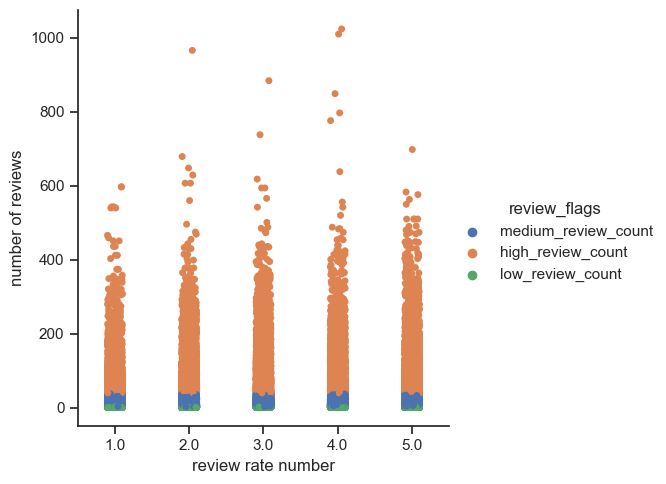

In [24]:
sns.set(style="ticks")
g = sns.catplot(x="review rate number", y="number of reviews", hue="review_flags", data=df)

In [25]:
#Export the visualization

g.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cat_reviews.png'))

## Key Questions

We can answer this question:

Geographic preferences: Is there a preference for certain types of housing in certain parts of New York City?

We can see that Manhattan and Brooklyn are preferred, which is understandable, since they are the most popular tourist destinations.

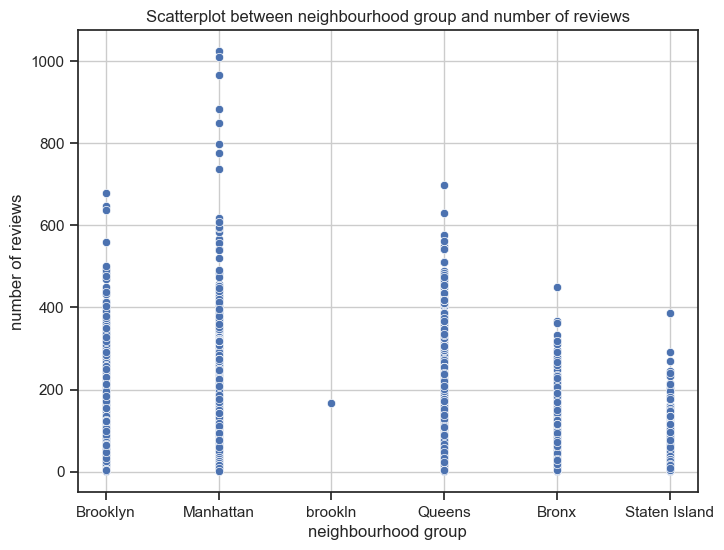

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=col1, y=col2)
plt.title(f'Scatterplot between {col1} and {col2}')
plt.xlabel(col1)
plt.ylabel(col2)
plt.grid(True)
plt.show()

A new question that arose from the results of the categorical plot is:  Is price the main factor influencing housing choice? Since low-rated housing also has a large number of views.

## Hypotheses

At this point, I have not yet fully explored all the variables to formulate specific hypotheses to test. First, I would like to use the analysis to see if factors such as affordability and location or reviews influence decision-making. If we see a small correlation between these variables, we can return to the study of the influence of price on the final decision.

